<a href="https://colab.research.google.com/github/shravani-karnati/Projects/blob/main/AI_based_Loan_Approval_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries and install XGBoost

In [1]:
!pip install xgboost


# Import data manipulation, visualization, and machine learning libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
from google.colab import files # To download the model file

# Load the training and testing datasets and display the head

In [6]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_test = pd.read_csv('/content/sample_data/test.csv')

print("Training data:")
print(df_train.head())
print("\nTesting data:")
print(df_test.head())

Training data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2    

# Display information and summary statistics of the training dataset

In [7]:
# Get information about the training dataset
print("\nTraining Dataset Info:")
print(df_train.info())

# Get summary statistics of the training dataset
print("\nTraining Summary Statistics:")
print(df_train.describe())


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Training Summary Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount

# Visualize the distribution of the target variable and key features

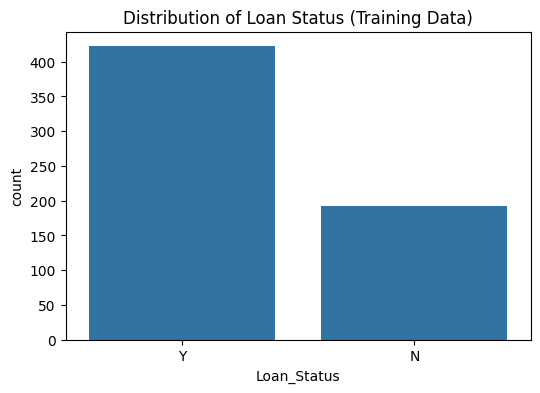

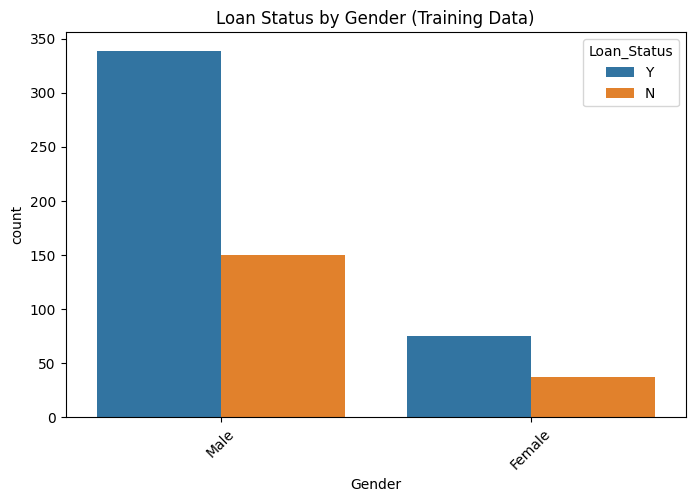

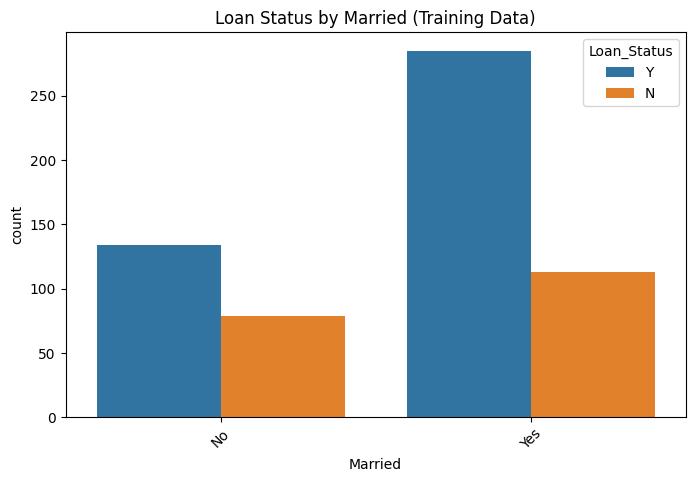

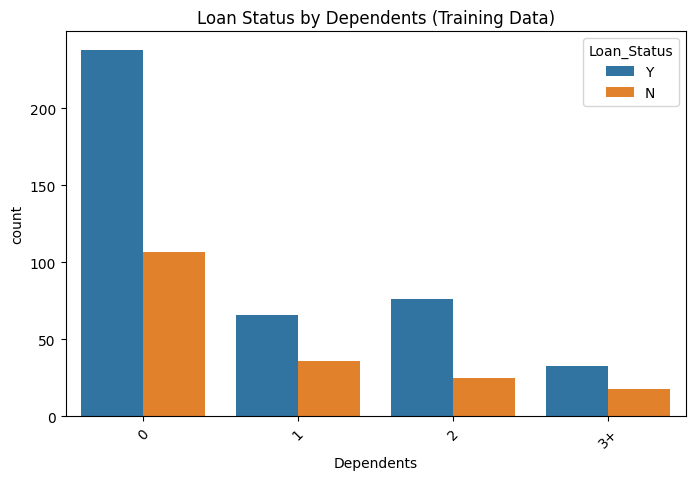

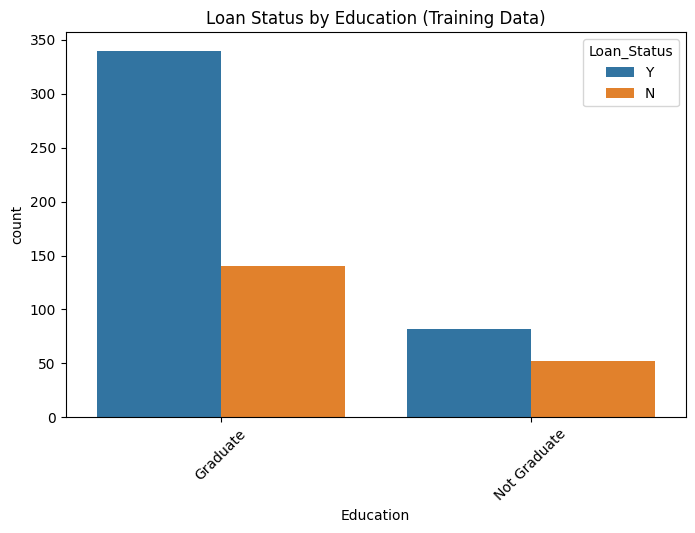

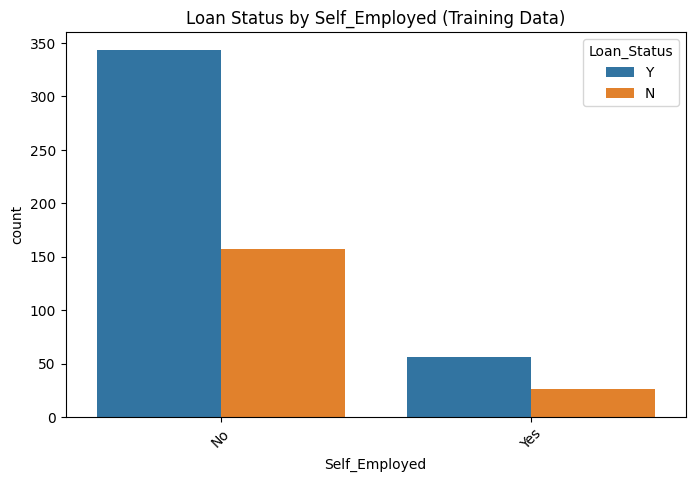

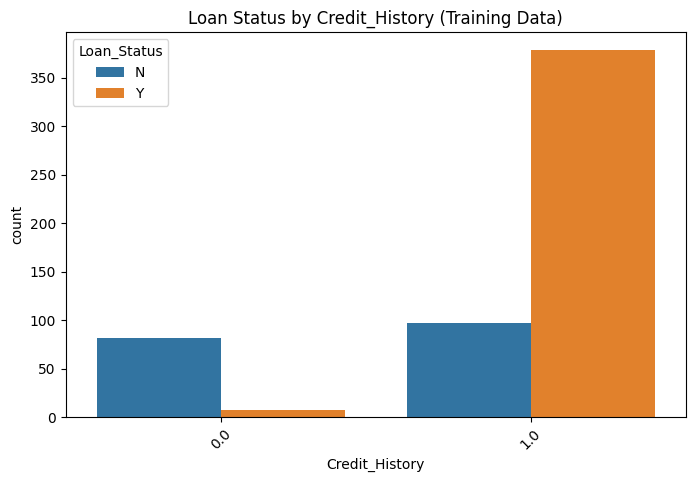

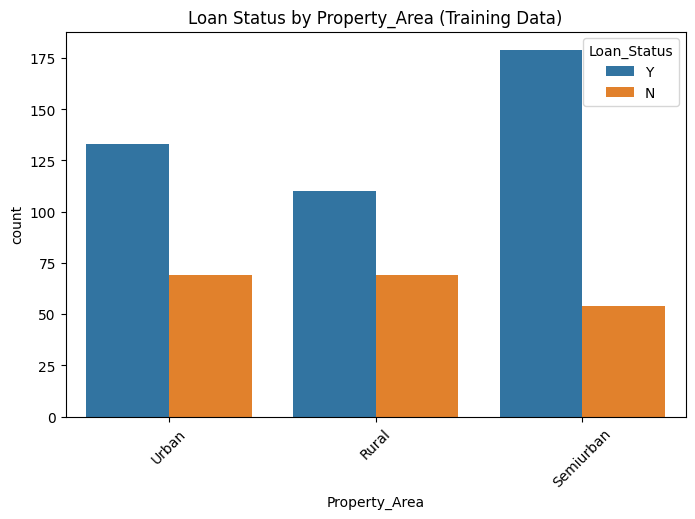

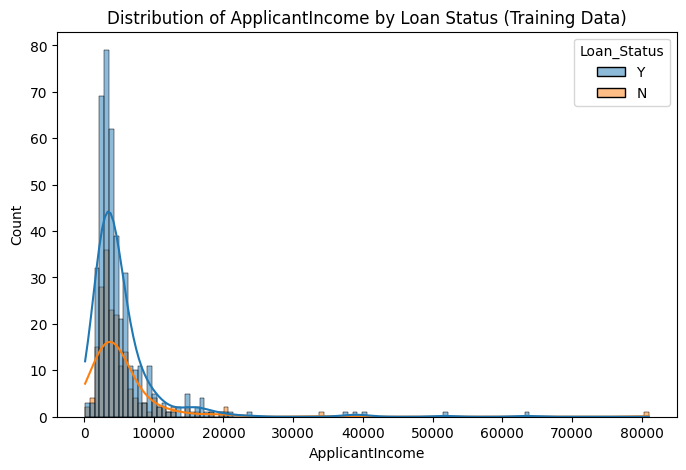

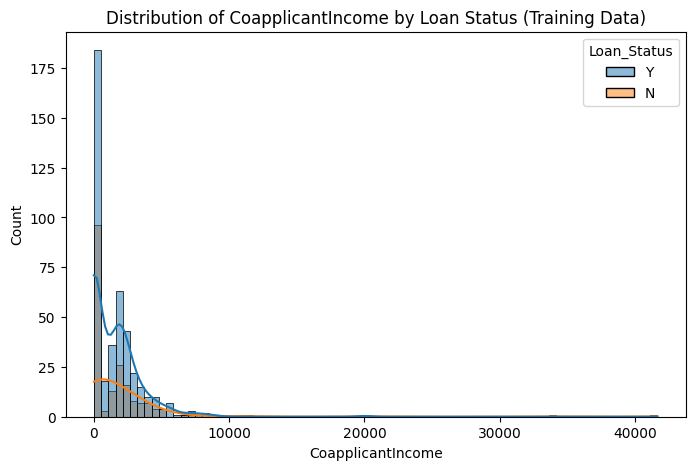

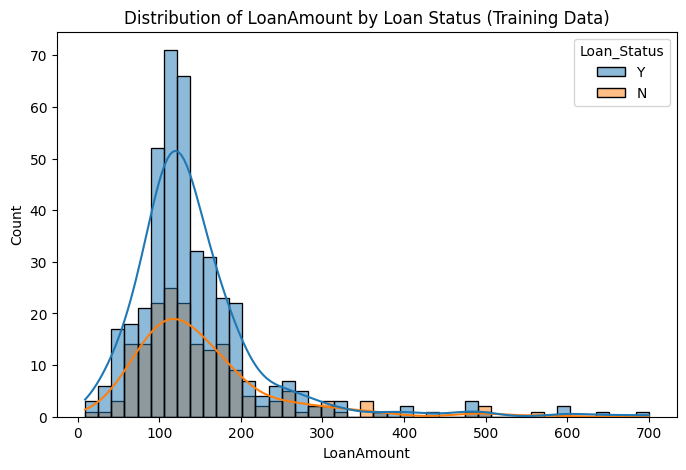

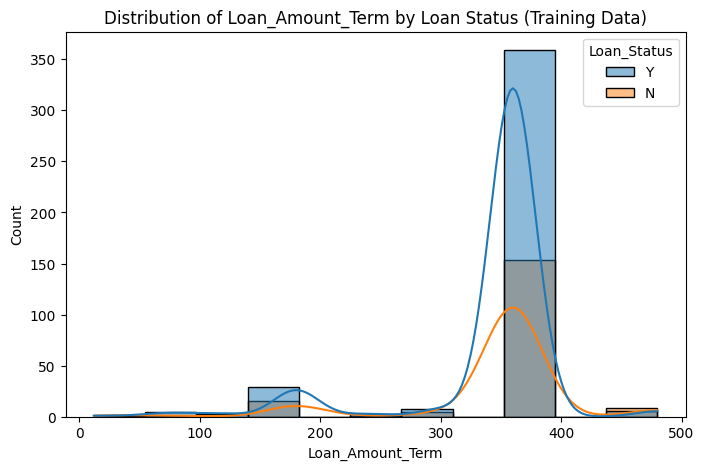

In [8]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df_train)
plt.title('Distribution of Loan Status (Training Data)')
plt.show()

# Visualize the distribution of some categorical features
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Loan_Status', data=df_train)
    plt.title(f'Loan Status by {col} (Training Data)')
    plt.xticks(rotation=45)
    plt.show()

# Visualize the distribution of numerical features
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(x=col, hue='Loan_Status', data=df_train, kde=True)
    plt.title(f'Distribution of {col} by Loan Status (Training Data)')
    plt.show()

# Check and handle missing values in the training and testing datasets

In [18]:
# Check for missing values in train data
print("\nMissing values in training data before handling:")
print(df_train.isnull().sum())

# Fill missing values in train data
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

# Check for missing values in train data after handling
print("\nMissing values in training data after handling:")
print(df_train.isnull().sum())

# Check for missing values in test data
print("\nMissing values in testing data before handling:")
print(df_test.isnull().sum())

# Fill missing values in test data (using modes/means from train data to avoid data leakage)
df_test['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_test['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_test['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_test['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_test['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
df_test['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_test['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

# Check for missing values in test data after handling
print("\nMissing values in testing data after handling:")
print(df_test.isnull().sum())


Missing values in training data before handling:
Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
TotalIncome            0
LoanAmountPerIncome    0
dtype: int64

Missing values in training data after handling:
Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
TotalIncome            0
LoanAmountPerIncome    0
dtype: int64

Missing values in testing data before handling:
Loan_ID                0
Gender                 0
Married                0
D

<ipython-input-18-39573330>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)
<ipython-input-18-39573330>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

# Create new features: Total Income and Loan Amount per Income

In [10]:
# Create a total income feature for train data
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']

# Create a feature for loan amount per income for train data
df_train['LoanAmountPerIncome'] = df_train['LoanAmount'] / df_train['TotalIncome']
# Handle potential division by zero
df_train['LoanAmountPerIncome'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_train['LoanAmountPerIncome'].fillna(df_train['LoanAmountPerIncome'].mean(), inplace=True)


# Create a total income feature for test data
df_test['TotalIncome'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']

# Create a feature for loan amount per income for test data
df_test['LoanAmountPerIncome'] = df_test['LoanAmount'] / df_test['TotalIncome']
# Handle potential division by zero
df_test['LoanAmountPerIncome'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_test['LoanAmountPerIncome'].fillna(df_train['LoanAmountPerIncome'].mean(), inplace=True) # Use mean from train data

<ipython-input-10-2199379005>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LoanAmountPerIncome'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-10-2199379005>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

# Prepare data for modeling: Separate features/target and apply encoding

In [11]:
# Separate features and target for training data
X_train_data = df_train.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_train_data = df_train['Loan_Status']

# Separate features for testing data
X_test_data = df_test.drop(['Loan_ID'], axis=1)

# Identify categorical and numerical columns in features
categorical_cols_X = X_train_data.select_dtypes(include='object').columns
numerical_cols_X = X_train_data.select_dtypes(exclude='object').columns

# Use OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols_X),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_X)
    ],
    remainder='passthrough' # Keep any columns not specified
)

# Apply the transformations to training features
X_train_encoded = preprocessor.fit_transform(X_train_data)

# Apply the transformations to testing features (using the fitted preprocessor)
X_test_encoded = preprocessor.transform(X_test_data)

# Use LabelEncoder for the target variable y in the training data
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_data)

# Split the training data into training and validation sets

In [12]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_encoded, y_train_encoded, test_size=0.2, random_state=42)

# Initialize, train, and evaluate the Logistic Regression model

In [19]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred_lr = log_reg.predict(X_val_split)

# Evaluate the model
print("Logistic Regression Performance (on Validation Set):")
print("Accuracy:", accuracy_score(y_val_split, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_val_split, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_val_split, y_pred_lr))

Logistic Regression Performance (on Validation Set):
Accuracy: 0.7886178861788617

Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5, # Using 5-fold cross-validation
                           n_jobs=-1) # Use all available cores

# Fit the grid search to the training data (before the train-validation split)
# Or fit to X_train_split, y_train_split if you still want a separate validation set
grid_search.fit(X_train_encoded, y_train_encoded)

# Get the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy found:", grid_search.best_score_)

# Train the final model with the best parameters on the full training data
xgb_clf_tuned = grid_search.best_estimator_
xgb_clf_tuned.fit(X_train_encoded, y_train_encoded)

# Now use xgb_clf_tuned for making predictions on the test data

Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Best accuracy found: 0.8094362255097961


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

# Initialize, train, and evaluate the XGBoost Classifier model

In [14]:
# Initialize and train the XGBoost model
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_split, y_train_split)

# Make predictions on the validation set
y_pred_xgb = xgb_clf.predict(X_val_split)

# Evaluate the model
print("\nXGBoost Classifier Performance (on Validation Set):")
print("Accuracy:", accuracy_score(y_val_split, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_val_split, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_val_split, y_pred_xgb))


XGBoost Classifier Performance (on Validation Set):
Accuracy: 0.7804878048780488

Confusion Matrix:
 [[25 18]
 [ 9 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.58      0.65        43
           1       0.80      0.89      0.84        80

    accuracy                           0.78       123
   macro avg       0.77      0.73      0.74       123
weighted avg       0.78      0.78      0.77       123



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:26:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Make predictions on the test data using the XGBoost model and create submission file

In [15]:
# Make predictions on the encoded test data using the best model (XGBoost)
test_predictions = xgb_clf.predict(X_test_encoded)

# Convert predictions back to original labels ('Y' or 'N')
# Assuming 'Y' was encoded as 1 and 'N' as 0
predicted_loan_status = le.inverse_transform(test_predictions)

# Create a DataFrame with Loan_ID and predicted Loan_Status for submission
submission_df = pd.DataFrame({'Loan_ID': df_test['Loan_ID'], 'Loan_Status': predicted_loan_status})

print("\nSample predictions on the test data:")
print(submission_df.head())


Sample predictions on the test data:
    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           N


# Train the final XGBoost model on the full training data and save it

In [16]:
# Train the best performing model (XGBoost) on the full encoded training data
xgb_clf_final = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf_final.fit(X_train_encoded, y_train_encoded)

# Save the final trained model
model_filename = 'loan_model.pkl'
pickle.dump(xgb_clf_final, open(model_filename, 'wb'))

print(f"\nFinal model trained on full training data saved as {model_filename}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:26:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Final model trained on full training data saved as loan_model.pkl


# Download the saved model and the test predictions submission file

In [17]:
# Download the saved model file
files.download(model_filename)

# Save the test predictions to a CSV file for submission
submission_df.to_csv('test_predictions.csv', index=False)

# Download the submission file
files.download('test_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>